###  Hypothesis 4: Higher education leads to higher income, even after adjusting for job type and province.

In [6]:
import pandas as pd
import statsmodels.api as sm

# Load and subset data
df = pd.read_csv("combined_income_health.csv")
df = df[['Highest_edu', 'Province', 'Work_ref', 'Earning']].copy()

# Drop rows with missing or invalid earnings
df = df[df['Earning'].notna() & (df['Earning'] > 0)]

# Convert to categorical
df['Highest_edu'] = df['Highest_edu'].astype('category')
df['Province'] = df['Province'].astype('category')
df['Work_ref'] = df['Work_ref'].astype('category')

# One-hot encode
X = pd.get_dummies(df[['Highest_edu', 'Province', 'Work_ref']], drop_first=True)

# Convert target to numeric
y = pd.to_numeric(df['Earning'], errors='coerce')

# 👀 DEBUG: Check dtypes
print("🔍 X dtypes:\n", X.dtypes)
print("🔍 y dtype:", y.dtype)

# 👀 DEBUG: Check for object types
print("\n🚫 Non-numeric columns in X:", X.select_dtypes(include='object').columns.tolist())

# Drop any NaNs (just in case)
X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna()
y = y.loc[X.index]

# Convert boolean columns to int (0/1)
X = X.astype(int)

# Add constant
X_const = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X_const).fit()
print(model.summary())


🔍 X dtypes:
 Highest_edu_2    bool
Highest_edu_3    bool
Highest_edu_4    bool
Highest_edu_9    bool
Province_11      bool
Province_12      bool
Province_13      bool
Province_24      bool
Province_35      bool
Province_46      bool
Province_47      bool
Province_48      bool
Province_59      bool
Work_ref_2       bool
dtype: object
🔍 y dtype: int64

🚫 Non-numeric columns in X: []
                            OLS Regression Results                            
Dep. Variable:                Earning   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     6630.
Date:                Tue, 25 Mar 2025   Prob (F-statistic):               0.00
Time:                        18:52:19   Log-Likelihood:            -7.1499e+06
No. Observations:              587361   AIC:                         1.430e+07
Df Residuals:                  587346   BIC:                   

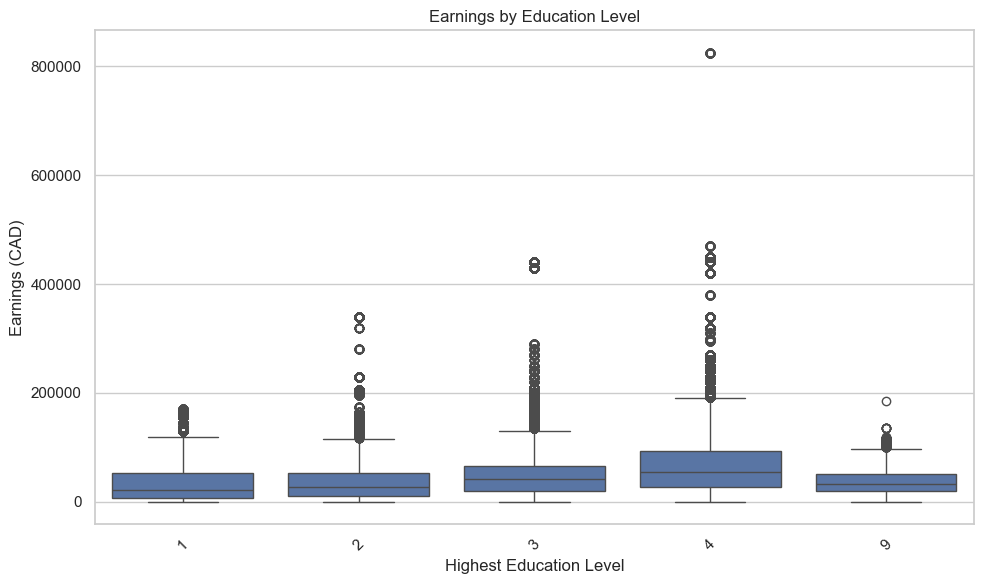

In [7]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Highest_edu', y='Earning')
plt.xticks(rotation=45)
plt.title("Earnings by Education Level")
plt.ylabel("Earnings (CAD)")
plt.xlabel("Highest Education Level")
plt.tight_layout()
plt.show()

### 🎓 Hypothesis 4: Education & Earnings

> **Hypothesis**: Higher education leads to higher earnings, even after adjusting for job type and province.

---

#### 📊 Regression Insights

- **Model**: OLS Linear Regression  
- **R²**: 0.136 — About 13.6% of income variation explained by education, province, and employment status.
- **Significant Predictors**:
  - **Postgraduate education**: +\$28.5k compared to base group
  - **College education**: +\$9.5k compared to base group
  - **Unemployment (Work_ref_2)**: −\$43k drop in earnings
- **All coefficients for provinces** are significantly negative, suggesting regional differences in earnings.

---

#### 📦 Boxplot Summary: Earnings by Education Level

![Earnings by Education Level](your_boxplot_image.png)

- **Trend**: Median earnings increase with education level, peaking at postgraduate (level 4).
- **Spread**: Earnings variability also grows with education, especially at postgraduate levels.
- **Outliers**: Higher education groups show more high-earning outliers.

---

#### ✅ Conclusion

Higher education is **strongly associated with increased earnings**, and this relationship remains robust even after controlling for **province and job status**. The boxplot further confirms this with visibly rising median incomes and wider spread for higher education levels.
